<a href="https://colab.research.google.com/github/mahipal2qa/Machine-learning/blob/main/unsupervisedlearningwithkmeansandPCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
cols = ["area","perimeter","compactness","length","asymmetry","groove","class"]
df = pd.read_csv("seeds_dataset.txt",names=cols, sep="\s+")

In [4]:
df.head()

,area,perimeter,compactness,length,asymmetry,groove,class
15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


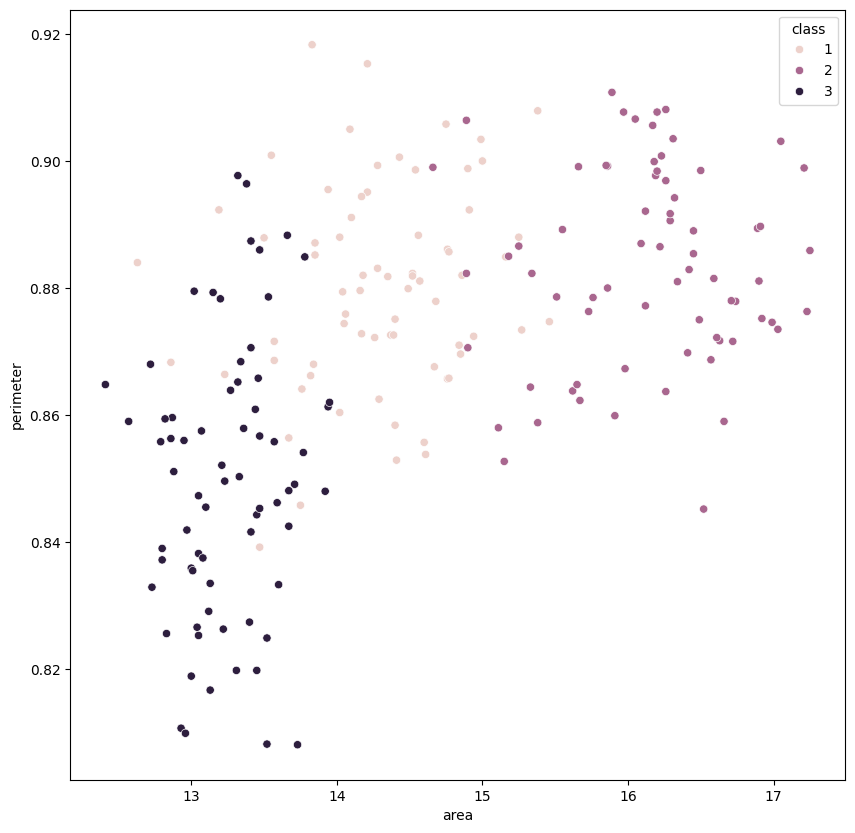

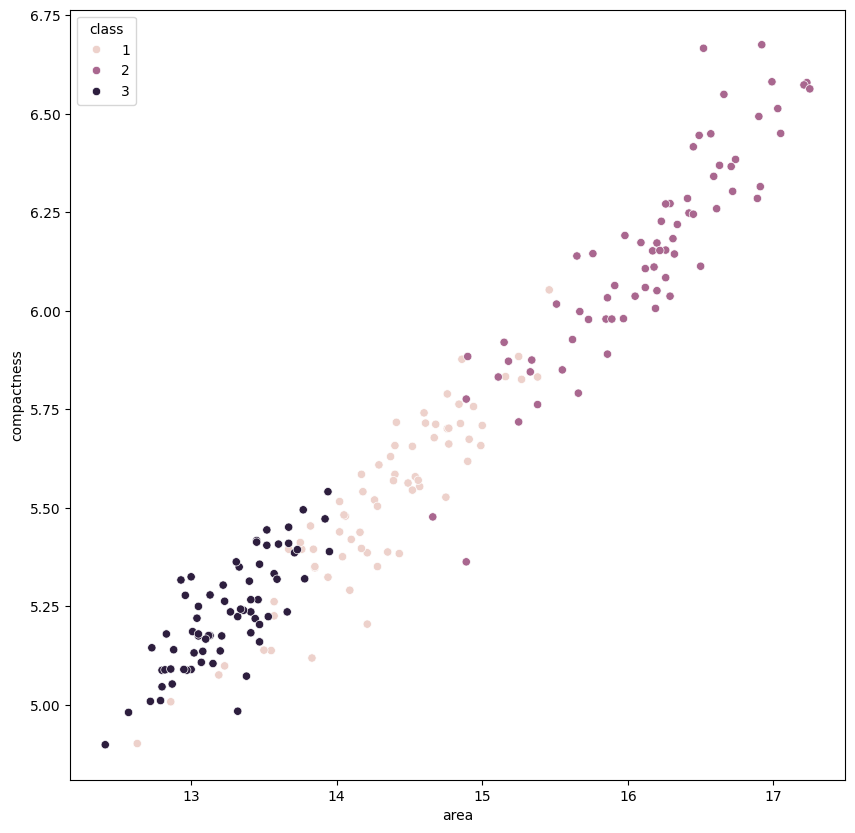

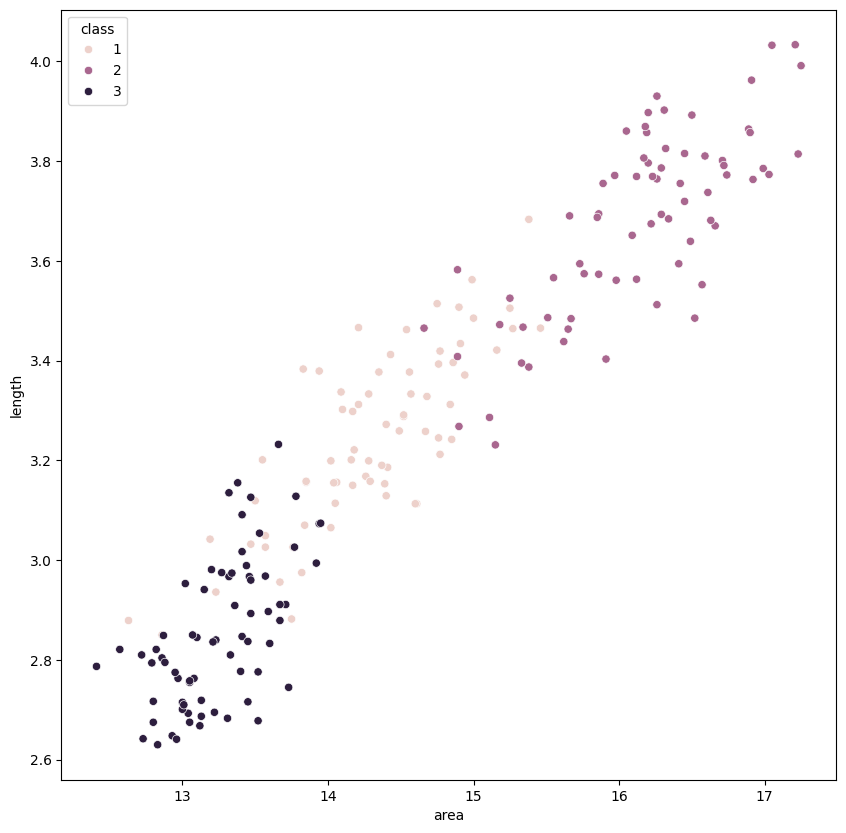

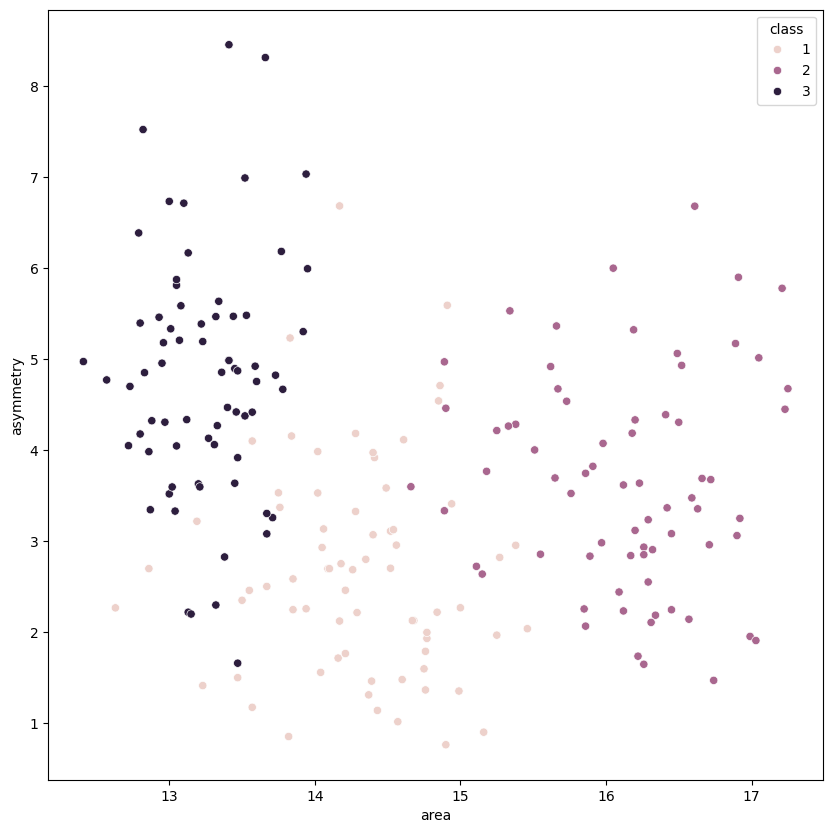

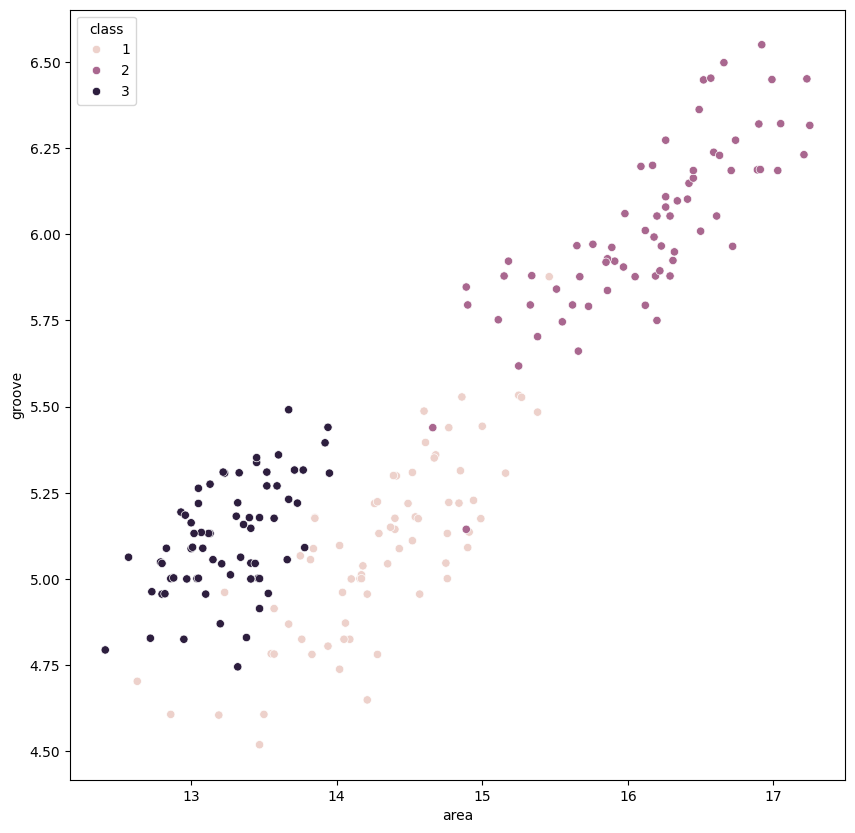

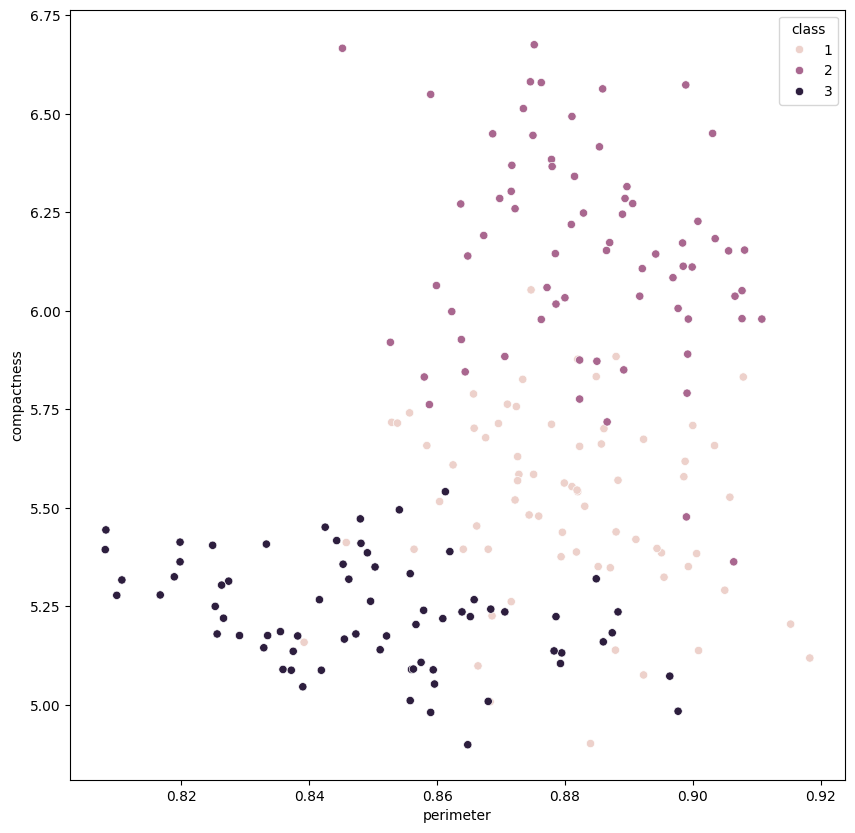

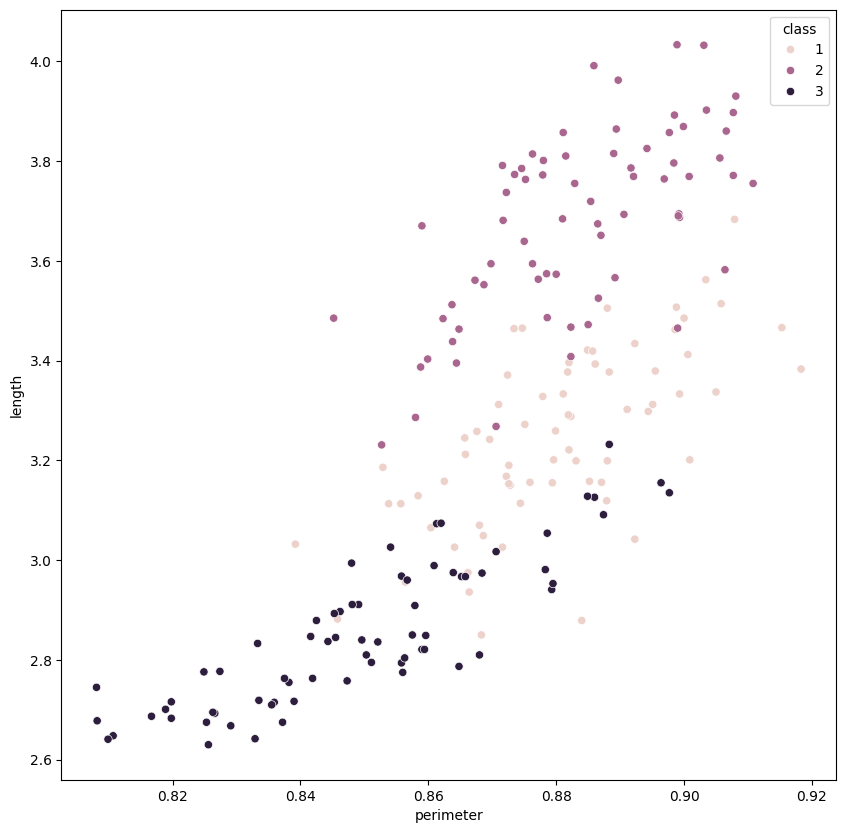

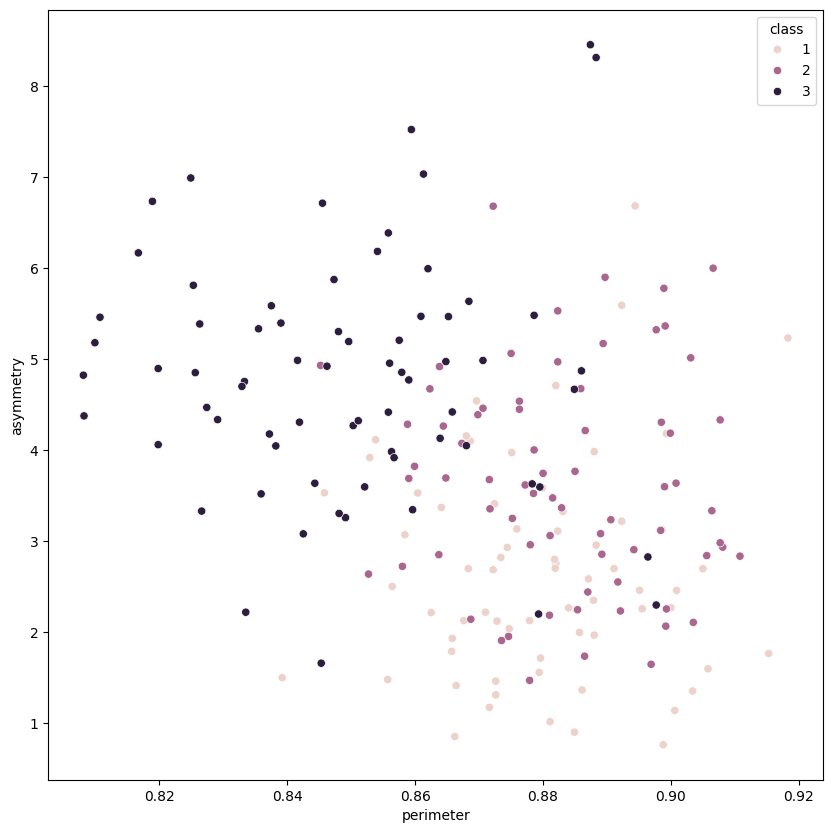

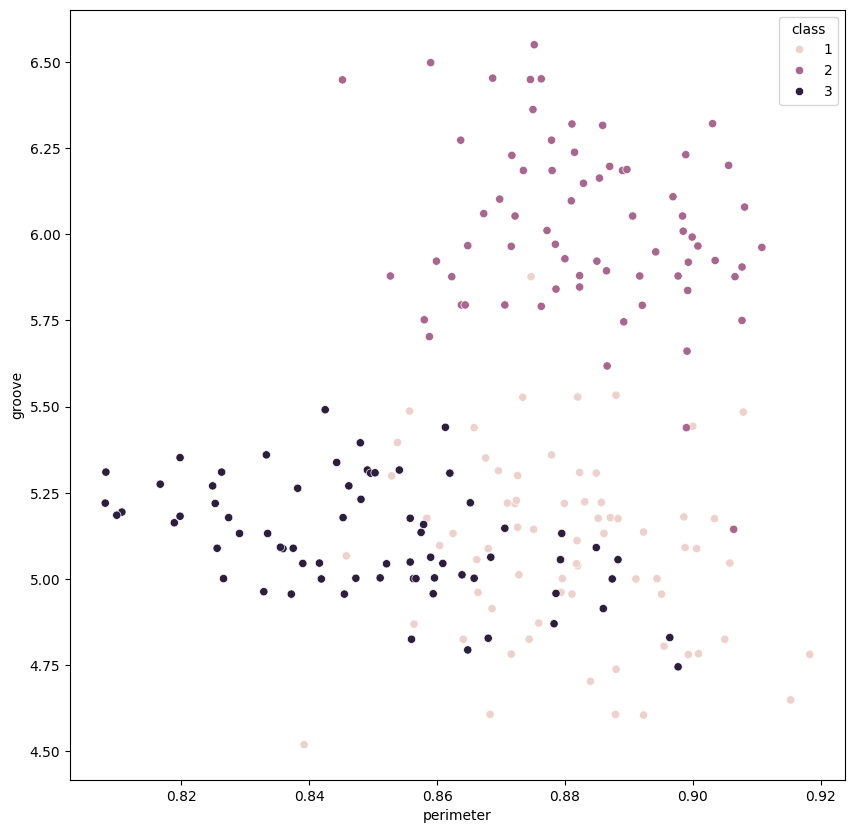

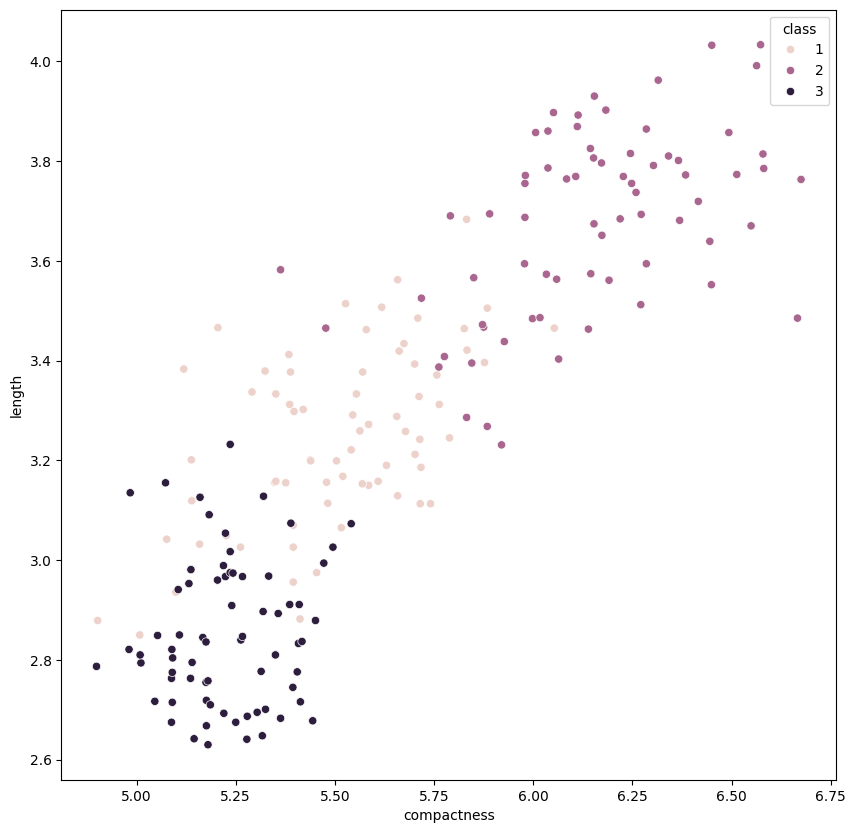

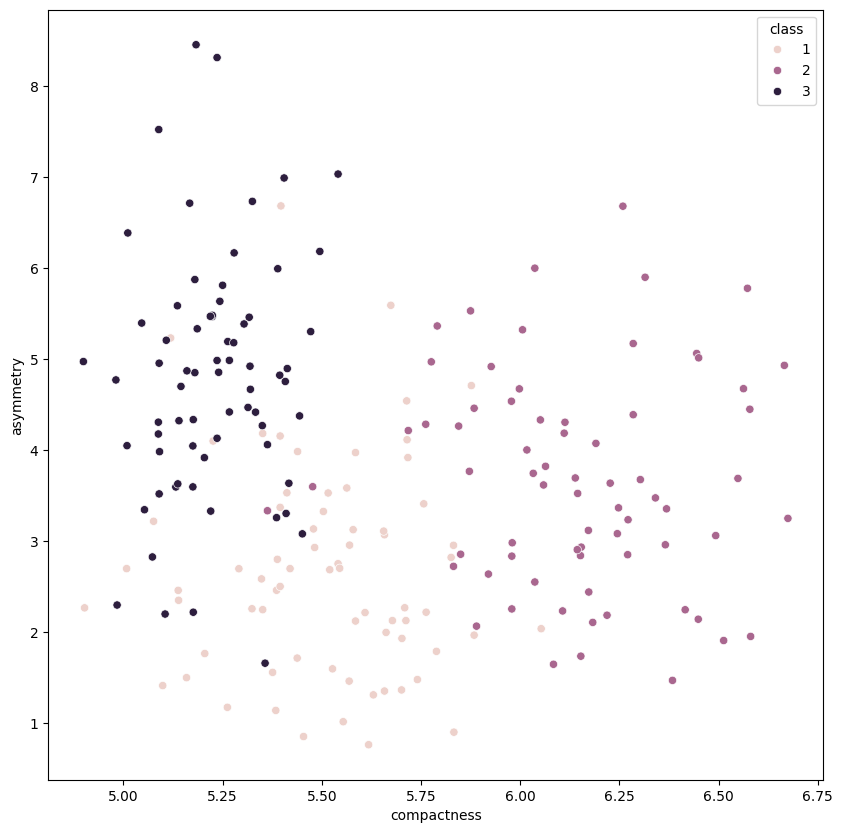

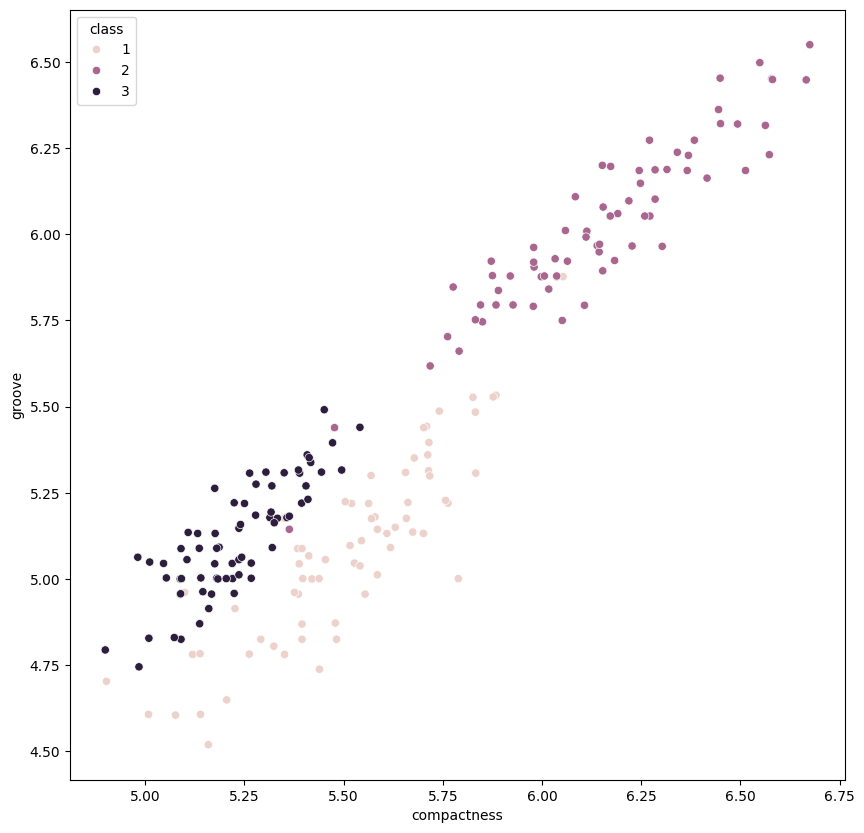

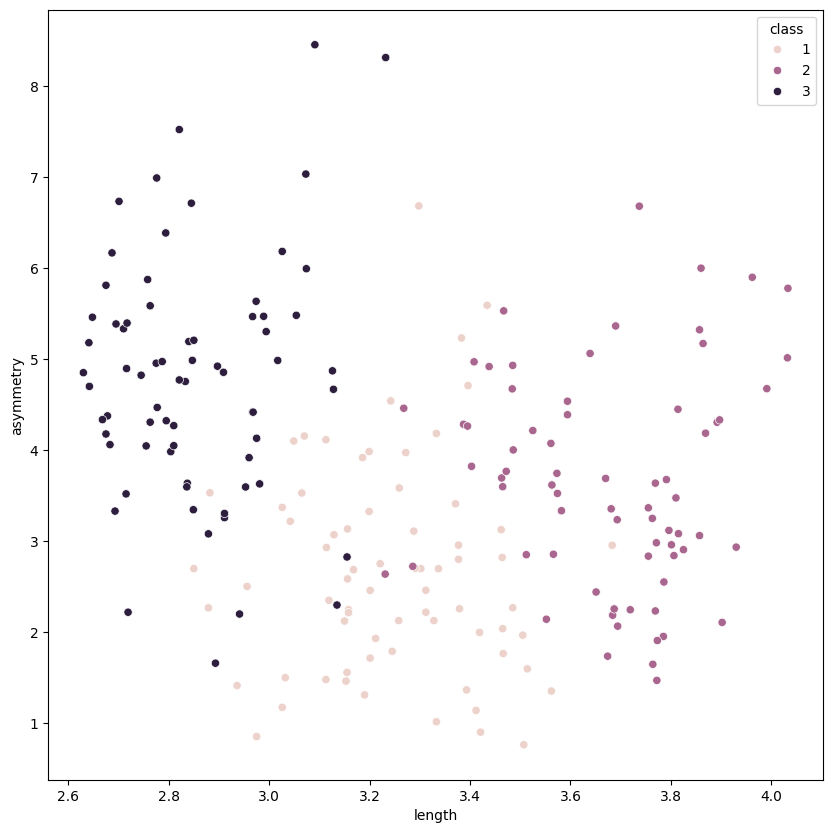

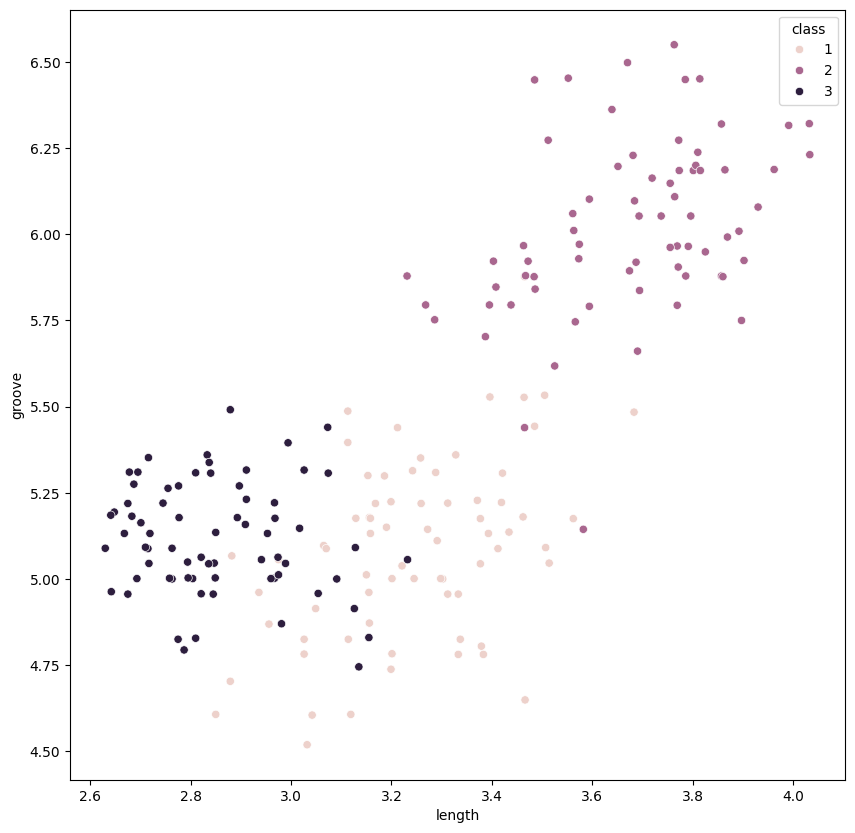

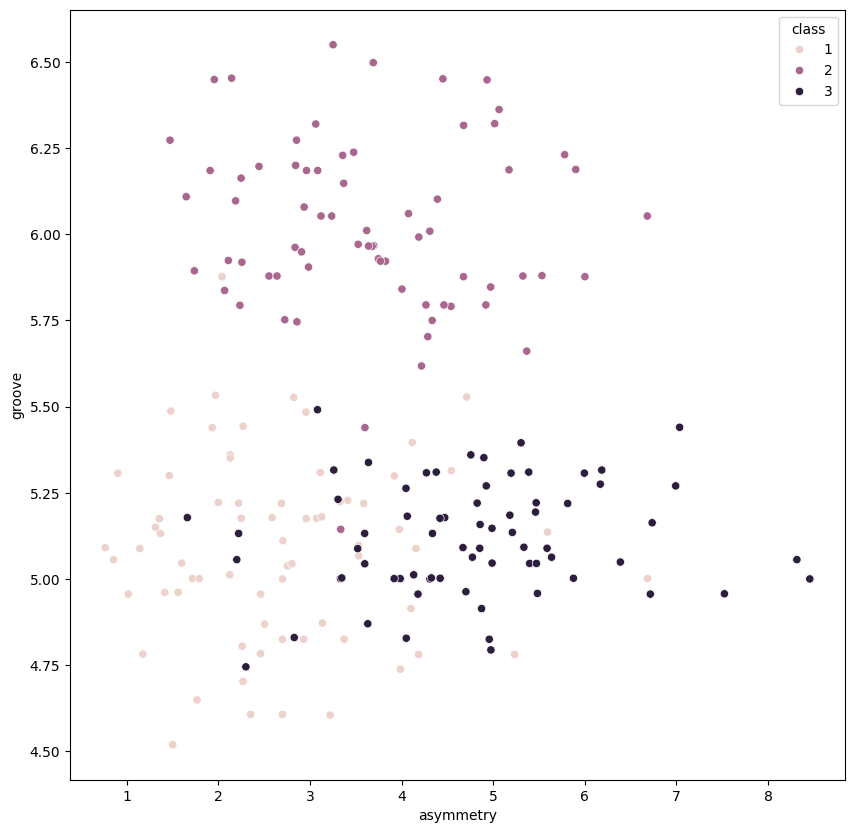

In [5]:
for i in range(len(cols)-1):
  for j in range(i+1, len(cols)-1):
    x_label = cols[i]
    y_label = cols[j]
    plt.figure(figsize=(10,10))
    sns.scatterplot(x=x_label,y=y_label, data=df, hue='class')
    plt.show()

Clustering

In [6]:
from sklearn.cluster import KMeans

In [7]:
x= "perimeter"
y= "asymmetry"
X= df[[x, y]].values

In [8]:
kmeans = KMeans(n_clusters=3).fit(X)

In [9]:
clusters = kmeans.labels_

In [10]:
cluster_df = pd.DataFrame(np.hstack((X, clusters.reshape(-1,1))),columns=[x,y,"class"])

[]

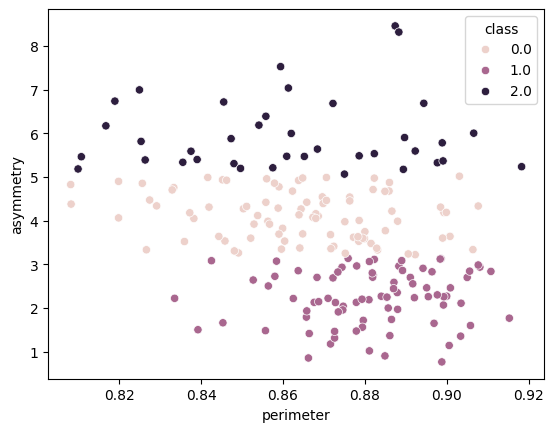

In [11]:
sns.scatterplot(x="perimeter",y="asymmetry",data=cluster_df,hue="class")
plt.plot()

Higher dimensions

In [12]:
X = df[cols[:-1]].values

In [13]:
kmeans = KMeans(n_clusters = 3).fit(X)
cluster_df = pd.DataFrame(np.hstack((X, kmeans.labels_.reshape(-1,1))),columns=cols)

[]

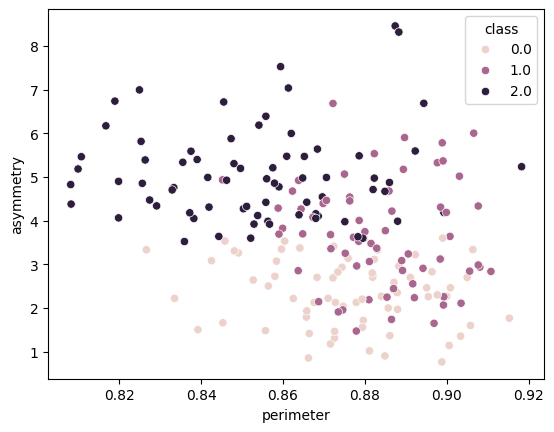

In [14]:
sns.scatterplot(x=x,y=y,data=cluster_df,hue="class")
plt.plot()

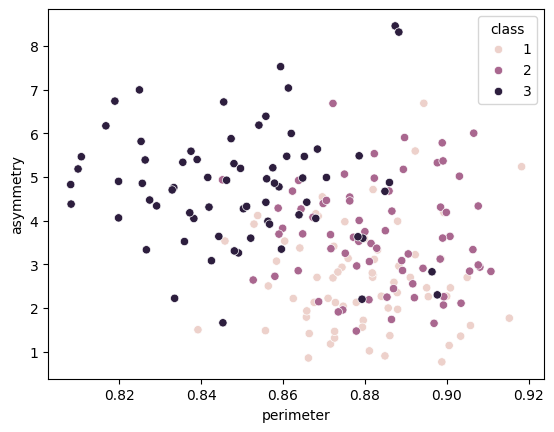

In [15]:
sns.scatterplot(x=x,y=y, data=df, hue='class')
plt.show()

PCA

In [16]:
from sklearn.decomposition import PCA

In [17]:
pca = PCA(n_components=2)
transformed_X = pca.fit_transform(X)

In [18]:
X.shape

(210, 6)

In [19]:
transformed_X.shape

(210, 2)

In [20]:
transformed_X[:5]

array([[-1.25049484, -0.84842757],
       [-1.87800113, -1.95198258],
       [-0.28939068, -1.19448128],
       [-0.52798375, -1.58030295],
       [-1.98745335, -1.34241666]])

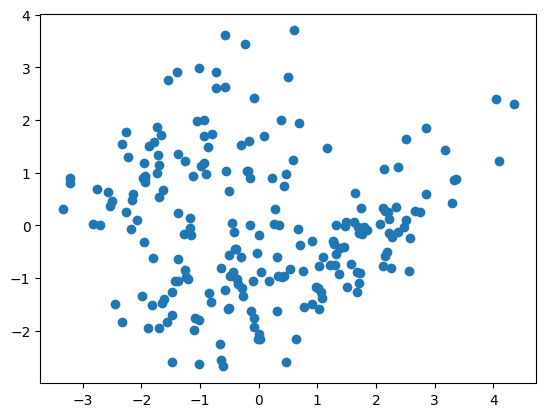

In [23]:
plt.scatter(transformed_X[:,0], transformed_X[:,1])
plt.show()

In [24]:
kmeans_pca_df = pd.DataFrame(np.hstack((transformed_X, kmeans.labels_.reshape(-1,1))),columns=["PC1","PC2","class"])

In [25]:
truth_pca_df = pd.DataFrame(np.hstack((transformed_X, df["class"].values.reshape(-1,1))),columns=["PC1","PC2","class"])

[]

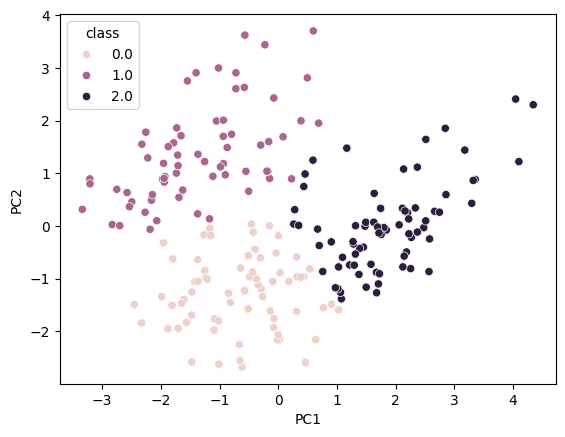

In [27]:
sns.scatterplot(x="PC1",y="PC2",data=kmeans_pca_df,hue="class")
plt.plot()

[]

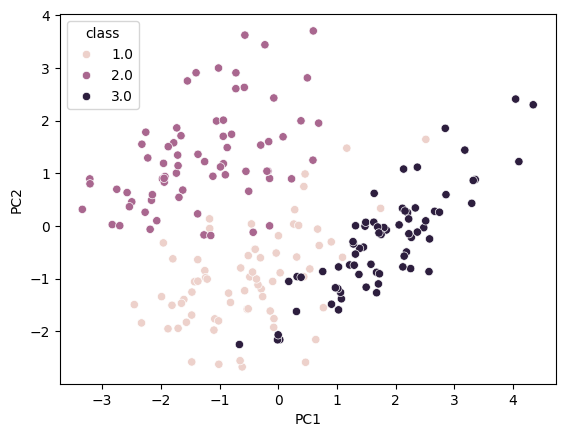

In [29]:
sns.scatterplot(x="PC1",y="PC2",data=truth_pca_df,hue="class")
plt.plot()